使用 15 分钟 K 线构造基础策略：当开盘 45 分钟内，连续三根 K 线出现我们定义的多头趋势时，开多仓。而当连续三根 K 线出现我们定义的空 头趋势时，则开空仓，当天平仓，不持隔夜仓。

如果开盘 价，最低价以及收盘价随 K 线依次上升，那么可以判定为上涨（多头）趋势。 如果开盘价，最高价以及收盘价随 K 线依次下降，那么可以判定为下跌（空头） 趋势。

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import calendar
import matplotlib.pyplot as plt

In [ ]:
import jqdatasdk
from jqdatasdk import *
auth('13277908318','Scofield199795')

In [ ]:
df = get_price('IF9999.CCFX', start_date='2016-01-01', end_date='2022-01-01', frequency='15m')

In [ ]:
df.to_excel("IF分钟收盘价.xlsx")

In [ ]:
df_day =get_price(['IF9999.CCFX'], start_date='2016-01-01', end_date='2022-01-01')

In [ ]:
df_day.to_excel("IF日收盘价.xlsx")

In [2]:
df =pd.read_excel("IF分钟收盘价.xlsx")
df_day =pd.read_excel("IF日收盘价.xlsx")

In [3]:
df

,Unnamed: 0,open,close,high,low,volume,money
0,2016-01-04 09:45:00,3640.0,3616.0,3657.4,3612.6,2178,2373514200
1,2016-01-04 10:00:00,3614.2,3607.8,3615.6,3594.0,1791,1936939080
2,2016-01-04 10:15:00,3607.8,3532.6,3607.8,3519.0,2215,2366643840
3,2016-01-04 10:30:00,3532.8,3531.8,3544.4,3501.0,1463,1547130300
4,2016-01-04 10:45:00,3530.2,3541.8,3546.0,3522.0,937,994189860
...,...,...,...,...,...,...,...
23371,2021-12-31 14:00:00,4940.6,4947.6,4949.8,4940.2,1887,2799176340
23372,2021-12-31 14:15:00,4947.6,4949.8,4950.8,4942.6,1820,2700428520
23373,2021-12-31 14:30:00,4949.2,4948.8,4954.0,4945.2,1972,2928388200
23374,2021-12-31 14:45:00,4948.8,4948.6,4951.8,4942.6,2136,3170380680


In [4]:
decision =[]
for i in range(0,len(df),16):
    open_long = bool(df["open"][i]<df["open"][i+1]<df["open"][i+2])
    low_long = bool(df["low"][i]<df["low"][i+1]<df["low"][i+2])
    close_long = bool(df["close"][i]<df["close"][i+1]<df["close"][i+2])
    
    open_short = bool(df["open"][i]>df["open"][i+1]>df["open"][i+2])
    high_short = bool(df["high"][i]>df["low"][i+1]>df["low"][i+2])
    close_short = bool(df["close"][i]>df["close"][i+1]>df["close"][i+2])    
    if open_long==True and low_long==True and close_long==True:
        temp = 1
    elif open_short==True and high_short==True and close_short==True:
        temp = -1
    else:
        temp = 0
    decision.append(temp)

In [5]:
#画图
df_return = df_day["close"].pct_change()
df_day["return"] = df_return
fund = 1 #起始值为1
fund_list=[]
for i in range(1,len(df_day)): 
    fund *= (1+df_day["return"][i])
    fund_list.append(fund)
plot_data = pd.DataFrame()
plot_data["time"] = df_day["time"][1:len(df_day)]
plot_data["market_value"] = fund_list

In [6]:
fund = 1 #起始值为1
fund_list=[]
for i in range(1,len(df_day)): 
    if decision[i] == 1:
        fund *= (1+df_day["return"][i]) #多头
    elif decision[i] == -1:
        fund *= (1-df_day["return"][i]) #空头
    else:
        fund = fund
    fund_list.append(fund)
            
plot_data["strategy_value"] = fund_list

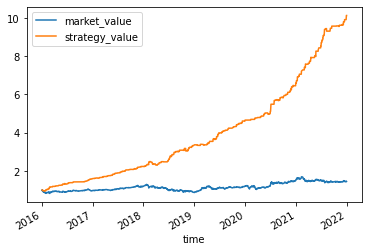

In [7]:
ax = plt.gca()
plot_data.plot( x = 'time' , y = 'market_value' , ax = ax )
plot_data.plot( x = 'time' , y = 'strategy_value' , ax = ax )

In [8]:
#计算年化收益

In [65]:
plot_data = plot_data.reset_index(drop=True)

In [66]:
plot_data

,time,market_value,strategy_value
0,2016-01-05,0.995270,1.000000
1,2016-01-06,1.011679,1.000000
2,2016-01-07,0.947504,1.000000
3,2016-01-08,0.966131,1.000000
4,2016-01-11,0.920234,0.952493
...,...,...,...
1455,2021-12-27,1.443796,9.920813
1456,2021-12-28,1.452438,9.920813
1457,2021-12-29,1.431533,10.063604
1458,2021-12-30,1.442336,10.139548


In [68]:
total_return = plot_data["strategy_value"][len(plot_data)-1]-1
yield_return = (1+total_return)**(1/(len(plot_data)/365))-1

In [69]:
yield_return

0.7844511054625305

In [13]:
#计算最大回撤

In [70]:
list_a = plot_data["strategy_value"]
list_cu = np.maximum.accumulate(list_a)
max_draw_list  =(list_cu-list_a)/list_cu
max_draw = max(max_draw_list)

In [71]:
max_draw

0.07377400132938888

In [72]:
index = np.argmax(max_draw_list)

In [73]:
plot_data["time"][index]

Timestamp('2018-04-02 00:00:00')

In [74]:
#计算夏普率

In [75]:
std = np.std(plot_data["strategy_value"])
SR = yield_return/std
SR

0.31125436837042586

In [76]:
#Calmar
Calmar = yield_return/max_draw
Calmar

10.633164683044427

In [77]:
#胜率

In [82]:
df_day = df_day.reset_index(drop=True)
df_day["decision"] =decision

In [83]:
win =[]
for i in range(len(df_day)):
    
    if df_day["return"][i]<0 and df_day["decision"][i] ==-1:
        temp = 1
    elif df_day["return"][i]>0 and df_day["decision"][i] ==1:
        temp = 1
    elif df_day["return"][i]<0 and df_day["decision"][i] ==0:
        temp = 1
    else:
        temp = 0
    win.append(temp)

In [84]:
winrate = sum(win)/len(win)
winrate

0.5352498288843258